## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BIKE DEMAND VISUALIZATION CAPSTONE PROJECT</p>


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">ABOUT THE FEATURES</p>



**- ``timestamp``** - timestamp field for grouping the data<br>
**- ``cnt``** - the count of a new bike shares<br>
**- ``t1``** - real temperature in C<br>
**- ``t2``** - temperature in C “feels like”<br>
**- ``hum``** - humidity in percentage<br>
**- ``wind_speed``** - wind speed in km/h<br>
**- ``weather_code``** - category of the weather<br>
**- ``is_holiday``** - boolean field - 1 holiday / 0 non holiday<br>
**- ``is_weekend``** - boolean field - 1 if the day is weekend<br>
**- ``season``** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>

**"weather_code" category description:**<br>
**``1``** = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br> 
**``2``** = scattered clouds / few clouds<br> 
**``3``** = Broken clouds<br> 
**``4``** = Cloudy<br> 
**``7``** = Rain/ light Rain shower/ Light rain<br> 
**``10``** = rain with thunderstorm<br> 
**``26``** = snowfall<br> 
**``94``** = Freezing Fog<br>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [8]:
df0 = pd.read_csv('c:/Users/asus/Desktop/proeler/csv/store_sharing.csv')
df = df0.copy()
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
df.shape

(17414, 10)

In [11]:
df.duplicated().value_counts()


False    17414
dtype: int64

In [12]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<Figure size 720x360 with 0 Axes>

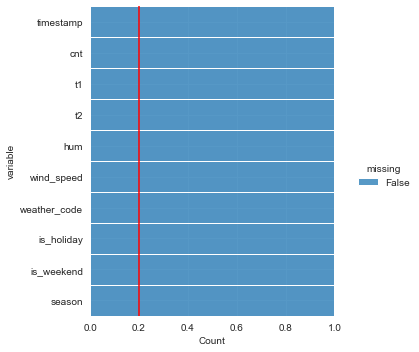

In [13]:
plt.figure(figsize = (10, 5))

sns.displot(
            data = df.isnull().melt(value_name="missing"),
            y = "variable",
            hue = "missing",
            multiple = "fill",
            height = 5)

plt.axvline(0.2, color = "r")
plt.show()

In [14]:
df.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().melt(value_name = "missing")

,variable,missing
0,timestamp,False
1,timestamp,False
2,timestamp,False
3,timestamp,False
4,timestamp,False
...,...,...
174135,season,False
174136,season,False
174137,season,False
174138,season,False


**SEASON**

In [16]:
season = df['season'].value_counts()
season


0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [17]:
print("Spring months :", df[df["season"]==0]["timestamp"].str[5:7].unique())
print("Summer months :", df[df["season"]==1]["timestamp"].str[5:7].unique())
print("Fall months   :", df[df["season"]==2]["timestamp"].str[5:7].unique())
print("Winter months :", df[df["season"]==3]["timestamp"].str[5:7].unique())

Spring months : ['03' '04' '05']
Summer months : ['06' '07' '08']
Fall months   : ['09' '10' '11']
Winter months : ['01' '02' '12']


In [18]:
season_index = df['season'].value_counts().index
season_index


Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')

In [19]:
season_values = df['season'].value_counts().values
season_values


array([4394, 4387, 4330, 4303], dtype=int64)

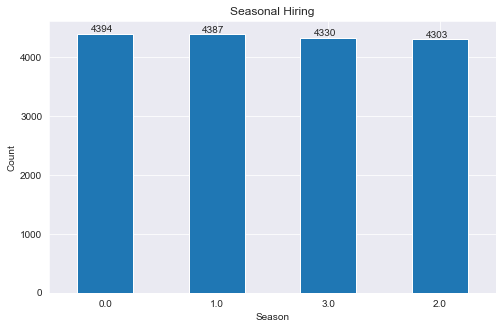

In [20]:


plt.figure(figsize=(8,5))

ax = df['season'].value_counts().plot(kind = "bar", 
                                      x = season_index, 
                                      y = season_values)

plt.xticks(rotation=0)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))


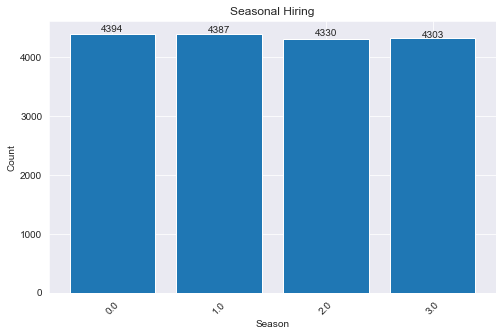

In [21]:

plt.figure(figsize=(8,5))

plt.bar(x = season_index, 
        height = season_values, 
        tick_label = season_index)


plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for index, value in enumerate(season_values):
    plt.text(index, value, str(value), va = "bottom", ha = "center");

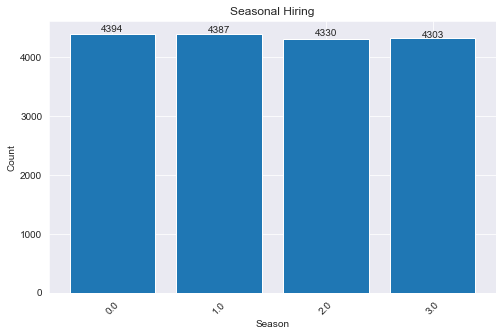

In [22]:

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x = season_index, 
       height = season_values, 
       tick_label = season_index)

ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.set_title("Seasonal Hiring")


for index, value in enumerate(season_values):
    ax.text(index, value, str(value), va = "bottom", ha = "center");

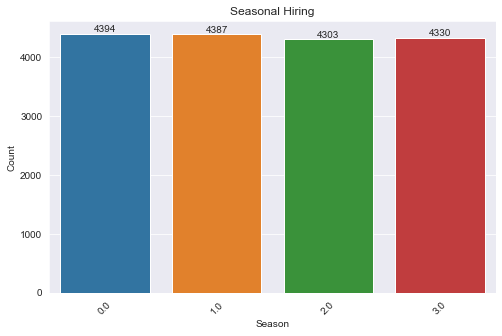

In [23]:


plt.figure(figsize=(8, 5))

ax = sns.barplot(x = season_index, 
                 y = season_values)

plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for container in ax.containers:
    ax.bar_label(container)

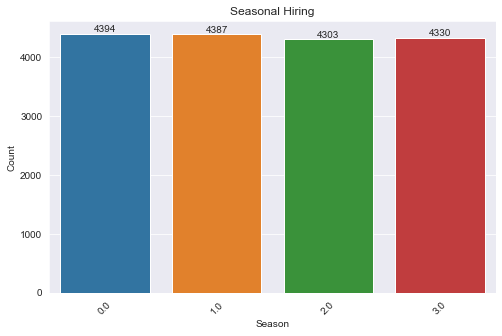

In [24]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='season', 
                   data=df)


plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for container in ax.containers:
    ax.bar_label(container)

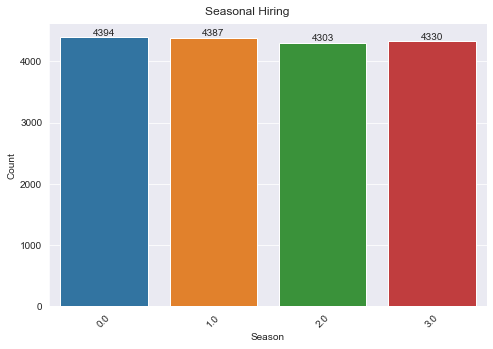

In [25]:
g = sns.factorplot(x = 'season', 
                   data = df, 
                   kind = 'count', 
                   size = 4.8, 
                   aspect = 1.45)

g.fig.subplots_adjust(top = 0.93)

g.set_xticklabels(rotation=45)     
g.set_xlabels('Season')
g.set_ylabels('Count')
g.fig.suptitle("Seasonal Hiring")

for container in g.ax.containers:
    g.ax.bar_label(container)

**İS_HOLİDAY**

In [26]:
is_holiday = df.is_holiday.value_counts()
is_holiday_index = df.is_holiday.value_counts().index
is_holiday_values = df.is_holiday.value_counts().values

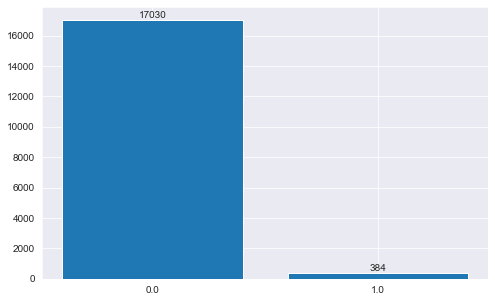

In [27]:

plt.figure(figsize = (8,5))

plt.bar(x = is_holiday_index, 
        height = is_holiday_values, 
        tick_label = is_holiday.index)

for index, value in enumerate(is_holiday.values):
    plt.text(index, value, str(value), va = "bottom", ha = "center")


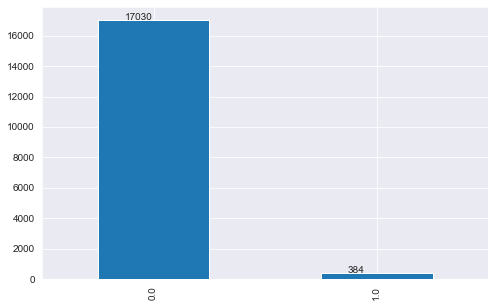

In [28]:
plt.figure(figsize = (8,5))

ax = df['is_holiday'].value_counts().plot(kind = "bar", 
                                          x = is_holiday_index, 
                                          y = is_holiday_values)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

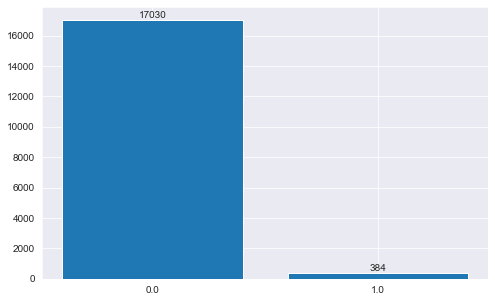

In [29]:

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(is_holiday_index, 
       is_holiday_values, 
       tick_label = is_holiday.index)

for container in ax.containers:
    ax.bar_label(container);

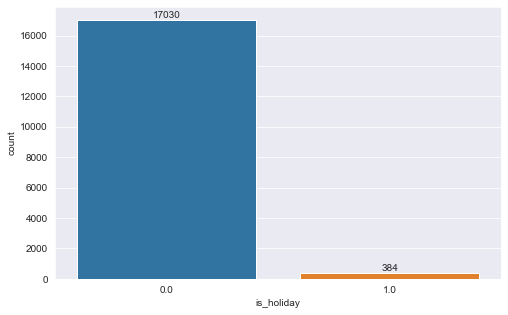

In [30]:
plt.figure(figsize = (8, 5))

ax = sns.countplot(x = 'is_holiday', 
                   data = df)

ax.bar_label(ax.containers[0], fmt = '%d');

**İS_WEEKEND**

In [31]:
is_weekend = df.is_weekend.value_counts()
is_weekend_index = df.is_weekend.value_counts().index
is_weekend_values = df.is_weekend.value_counts().values

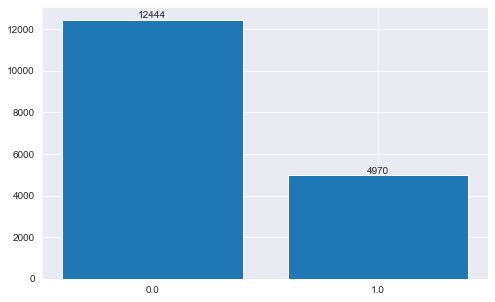

In [32]:

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(is_weekend_index, 
       is_weekend_values, 
       tick_label = is_weekend.index)

for container in ax.containers:
    ax.bar_label(container);

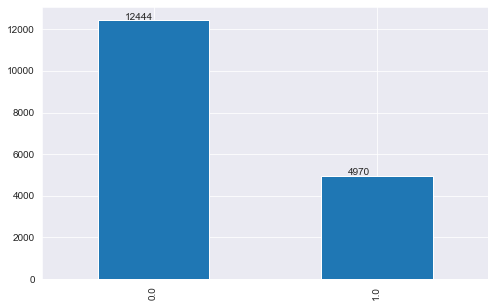

In [33]:

plt.figure(figsize = (8,5))

ax = df['is_weekend'].value_counts().plot(kind = "bar", 
                                          x = is_weekend_index, 
                                          y = is_weekend_values)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

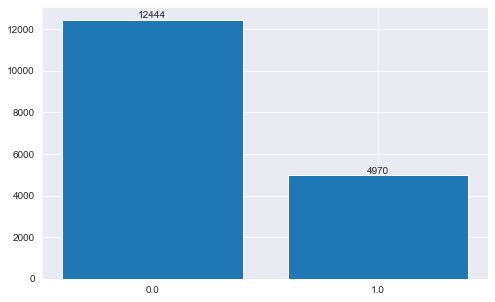

In [34]:

plt.figure(figsize = (8,5))

plt.bar(x = is_weekend_index, 
        height = is_weekend_values, 
        tick_label = is_weekend.index)

for index, value in enumerate(is_weekend_values):
    plt.text(index, value, str(value), va = "bottom", ha = "center");

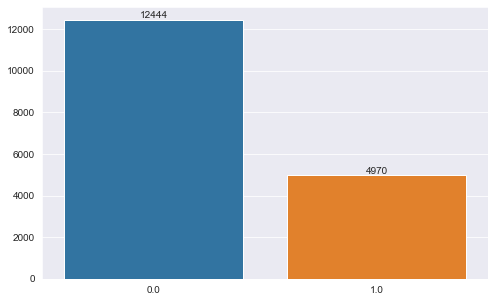

In [35]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = is_weekend_index, 
                 y = is_weekend_values);

for container in ax.containers:
    ax.bar_label(container)

**WEATHER_CODE**

In [36]:
weather_code = df.weather_code.value_counts()
weather_code_index = df.weather_code.value_counts().index
weather_code_values = df.weather_code.value_counts().values

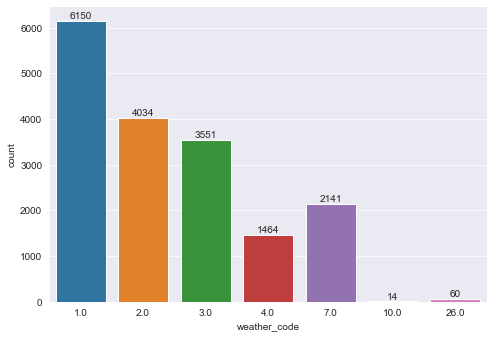

In [37]:

g = sns.factorplot(x = 'weather_code', 
                   data = df, 
                   kind = 'count', 
                   size = 4.8, 
                   aspect = 1.45);
       
for container in g.ax.containers:
    g.ax.bar_label(container)

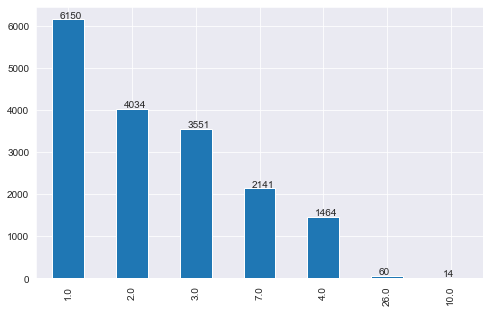

In [38]:
plt.figure(figsize = (8,5))

ax = df['weather_code'].value_counts().plot(kind = "bar")

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

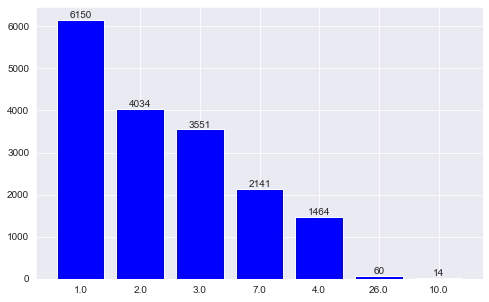

In [39]:

keys = df.weather_code.value_counts().index
values = df.weather_code.value_counts().values


x = range(len(keys))

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x, values, 0.8, color = 'b', align = 'center')          
ax.set_xticks(x)
ax.set_xticklabels(keys);

for container in ax.containers:
    ax.bar_label(container);

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [41]:
type(df['timestamp'][0])

str

In [42]:
df.timestamp = pd.to_datetime(df['timestamp'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [44]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [45]:
df.set_index('timestamp', inplace=True)

In [46]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [47]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [48]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [49]:
f = lambda x: x.strftime('%Y-%m') 

df['year_month'] = f(df.index)
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [50]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [51]:
df.year.unique()

array([2015, 2016, 2017], dtype=int64)

In [52]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [53]:
np.sort(df.day_of_month.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [54]:
np.sort(df.day_of_week.unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [55]:
np.sort(df.hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [56]:
df.day_of_week.value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: day_of_week, dtype: int64

In [57]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [58]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


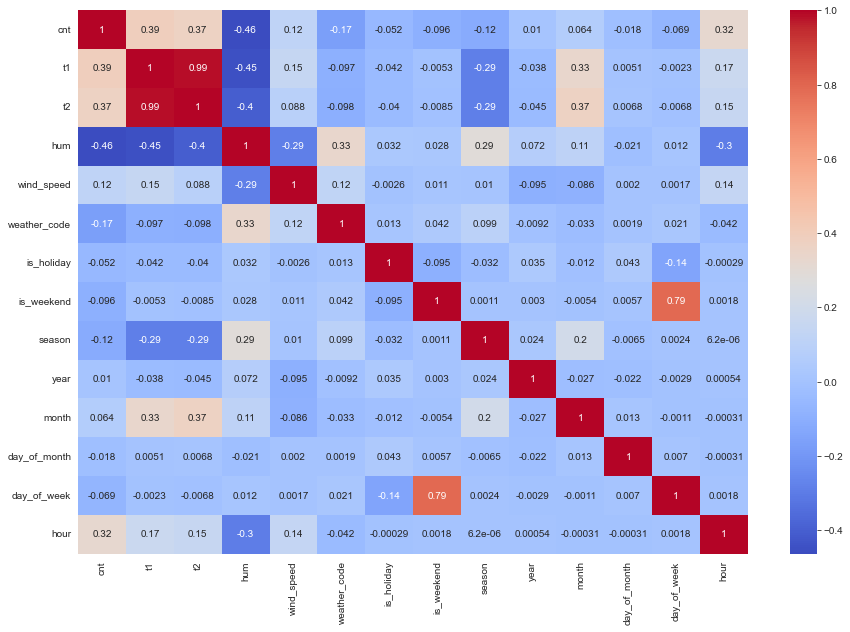

In [59]:

plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "coolwarm");

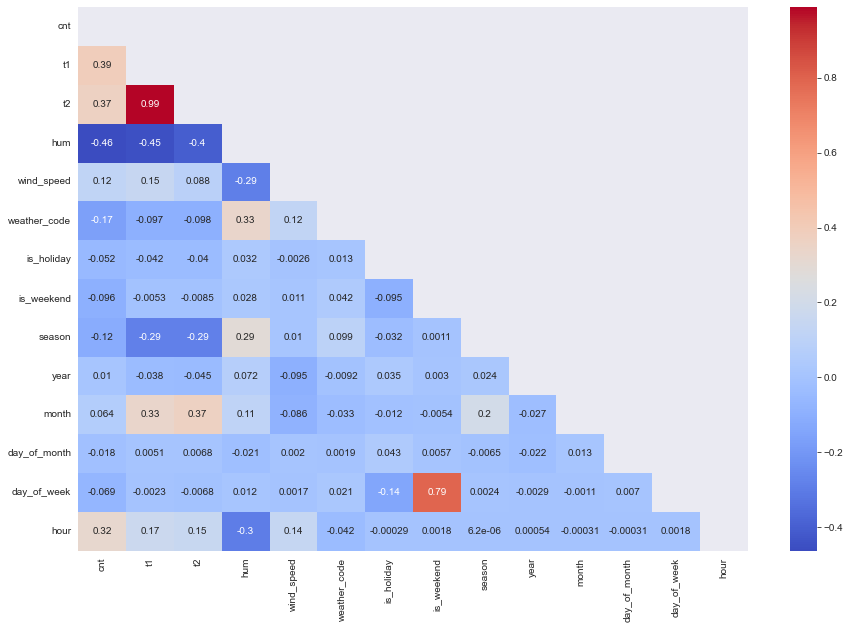

In [60]:

plt.figure(figsize = (15, 10))

matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "coolwarm", 
            mask = matrix);

In [61]:
df.corr().iloc[:,0]

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week    -0.068688
hour            0.324423
Name: cnt, dtype: float64

In [62]:
df_corr_cnt = df.corr()[['cnt']].sort_values(by = 'cnt', ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


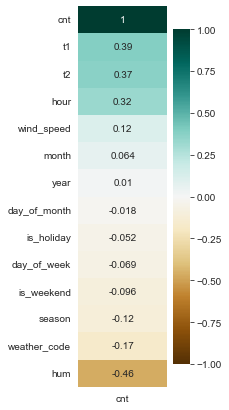

In [63]:

plt.figure(figsize = (2, 7))

sns.heatmap(df_corr_cnt, 
            vmin = -1, 
            vmax = 1, 
            annot = True, 
            cmap = 'BrBG');

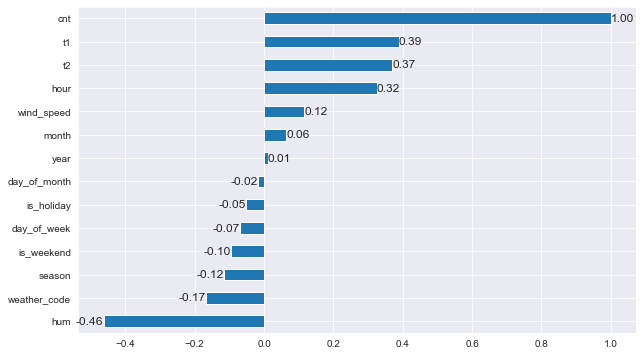

In [64]:
plt.figure(figsize = (10, 6))

ax = df.corr()["cnt"].sort_values().plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize = 12)

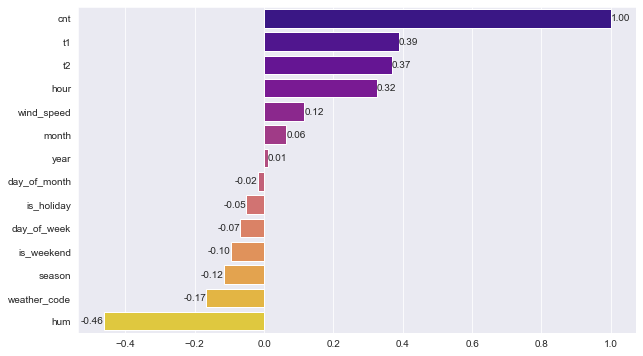

In [65]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x = df.corr().iloc[:,0].sort_values(ascending = False).values,
                 y = df.corr().iloc[:,0].sort_values(ascending = False).index,
                 palette = "plasma")

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f")

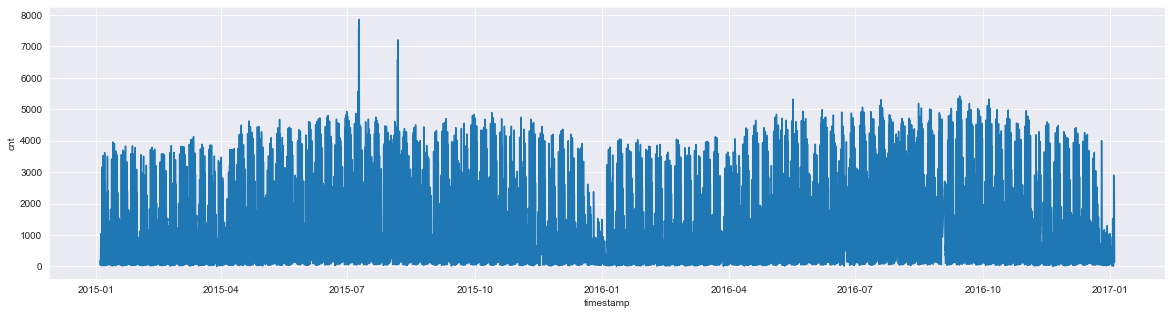

In [66]:

plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index, 
             y = 'cnt', 
             data = df)
plt.show()

In [67]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [68]:

df_sum = pd.DataFrame(df.groupby("year_month")["cnt"].sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


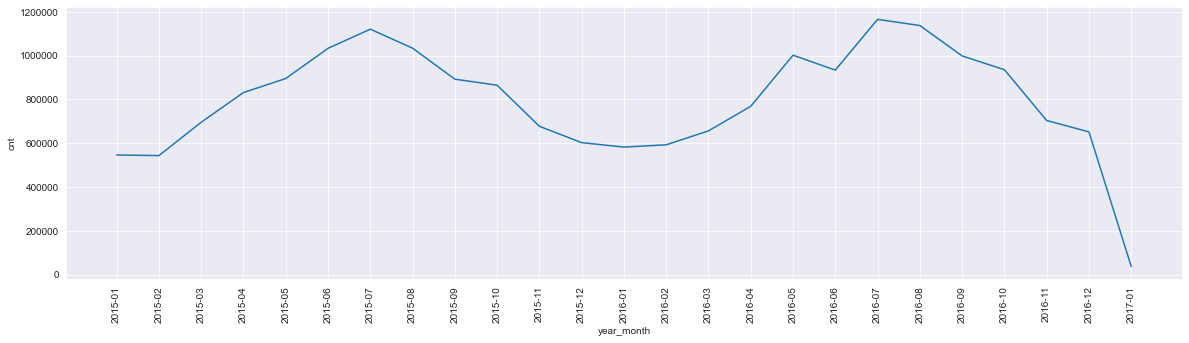

In [69]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'year_month', 
             y = 'cnt', 
             data = df_sum)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 90);


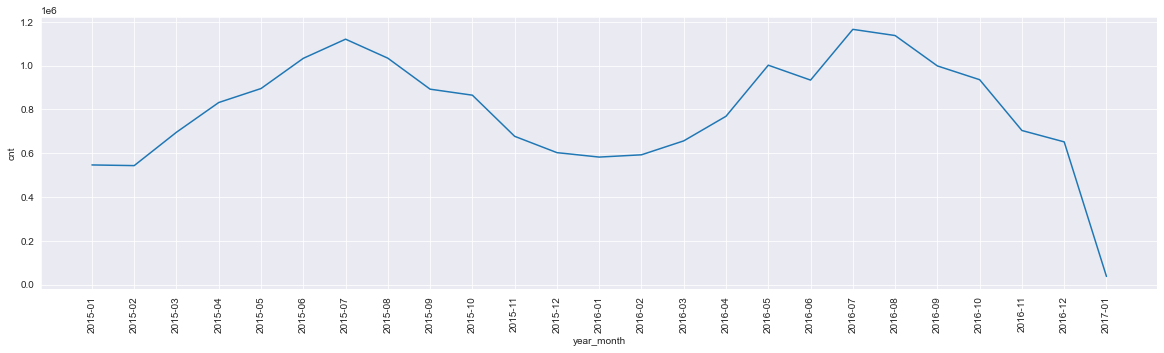

In [70]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, 
             x = "year_month", 
             y = "cnt", 
             estimator = 'sum', 
             ci = None)
plt.xticks(rotation = 90)

plt.show()

In [71]:
df.groupby("year_month")["cnt"].mean()

year_month
2015-01     814.663189
2015-02     810.125186
2015-03     941.723951
2015-04    1156.581363
2015-05    1203.512097
2015-06    1441.076709
2015-07    1514.441892
2015-08    1389.719086
2015-09    1255.243319
2015-10    1175.334239
2015-11     952.646976
2015-12     814.645946
2016-01     782.954301
2016-02     861.787791
2016-03     900.585734
2016-04    1069.325452
2016-05    1346.686828
2016-06    1324.649645
2016-07    1572.910931
2016-08    1536.910811
2016-09    1462.106881
2016-10    1259.362046
2016-11     978.941586
2016-12     876.220430
2017-01     523.333333
Name: cnt, dtype: float64

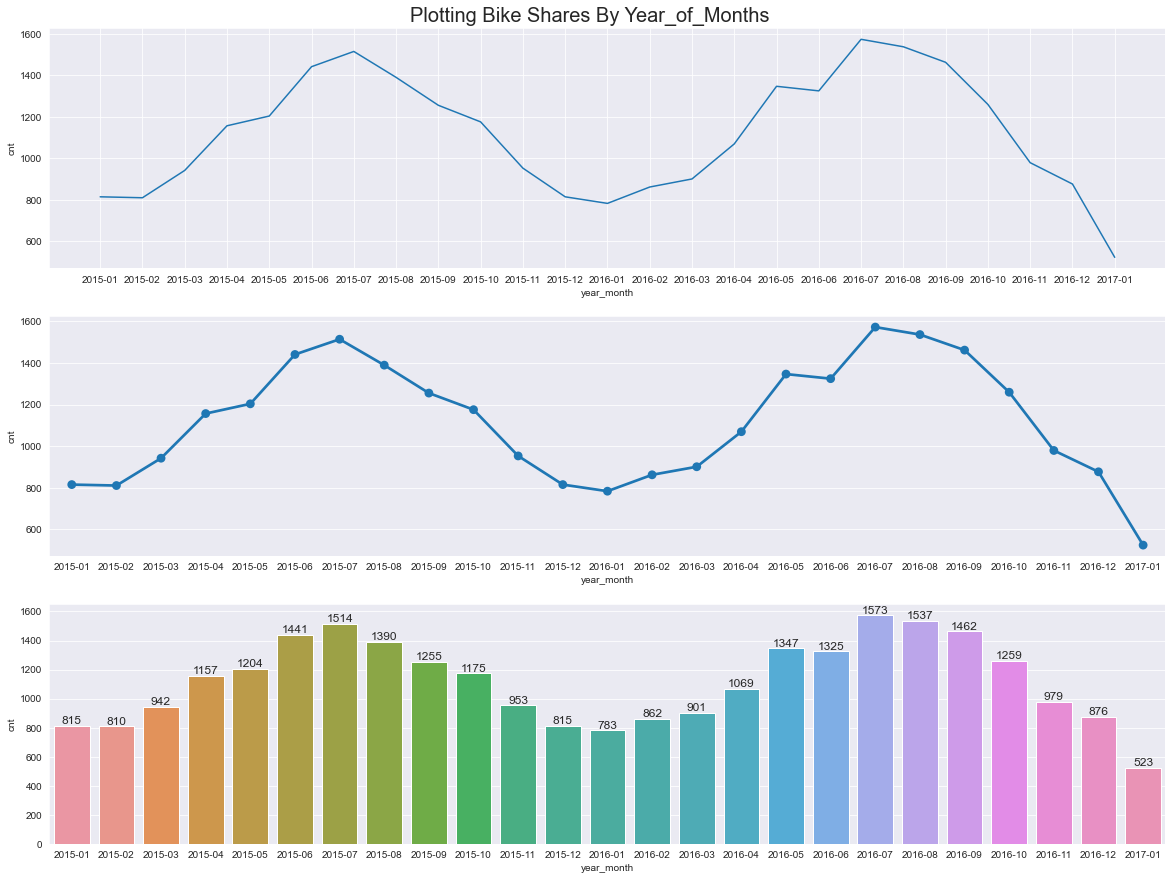

In [72]:

fig, ax = plt.subplots(nrows= 3, ncols = 1, figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Year_of_Months", y = 0.9, fontsize = 20)

sns.lineplot(x = df.year_month, y = df.cnt, ax = ax[0], ci = None)

sns.pointplot(x = df.year_month, y = df.cnt, ax = ax[1], ci = None)

sns.barplot(x = df.year_month, y = df.cnt, ax = ax[2], ci = None)
for container in ax[2].containers:
    ax[2].bar_label(container, fmt = "%.0f", fontsize = 12);

In [73]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

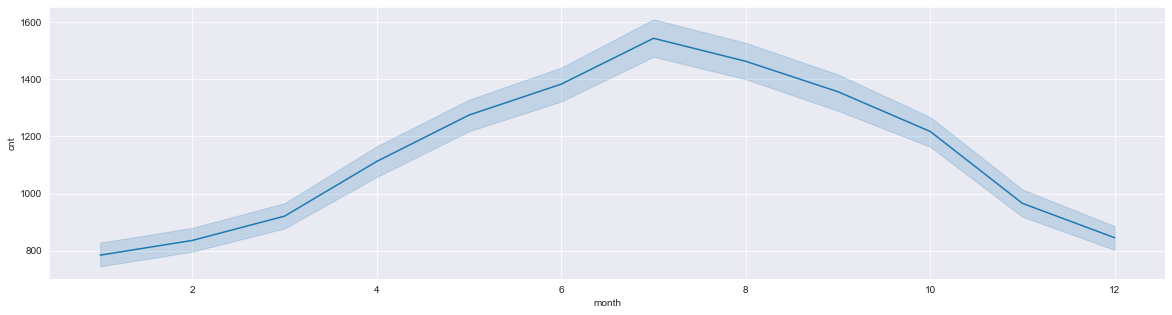

In [74]:
plt.figure(figsize = (20,5))

sns.lineplot(x = 'month', 
             y = 'cnt', 
             data = df);


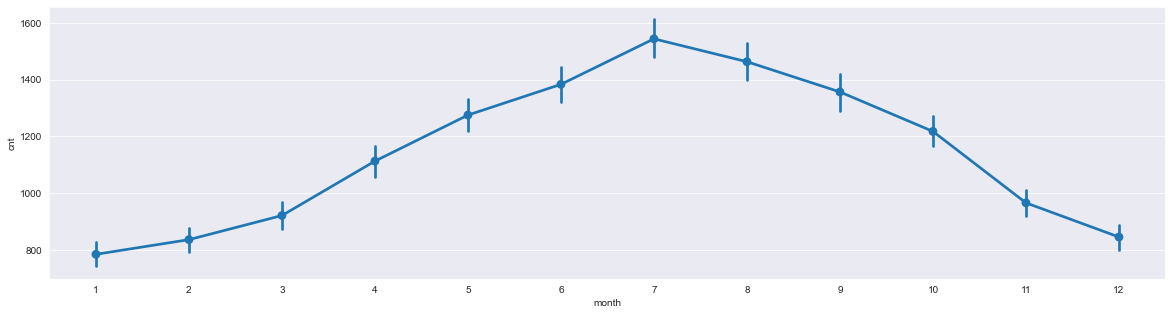

In [75]:

plt.figure(figsize = (20,5))

sns.pointplot(x = "month", 
              y ="cnt", 
              data = df);

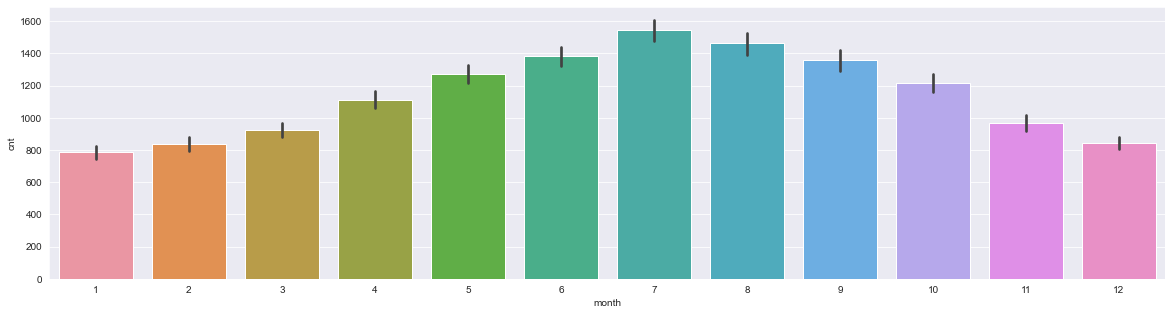

In [76]:

plt.figure(figsize = (20,5))

sns.barplot(x = "month", 
            y = "cnt", 
            data = df);


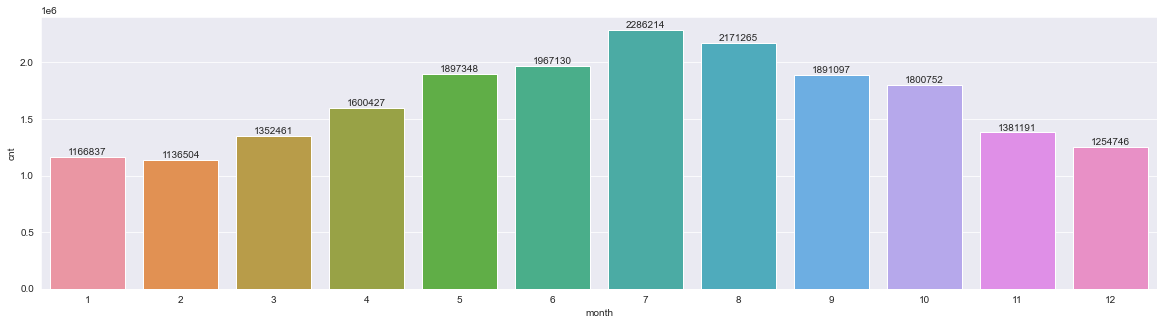

In [77]:

plt.figure(figsize = (20,5))

chart = sns.barplot(x = "month", 
                    y = "cnt", 
                    data = df, 
                    estimator = sum, 
                    ci = None)

chart.bar_label(chart.containers[0], fmt = '%d');

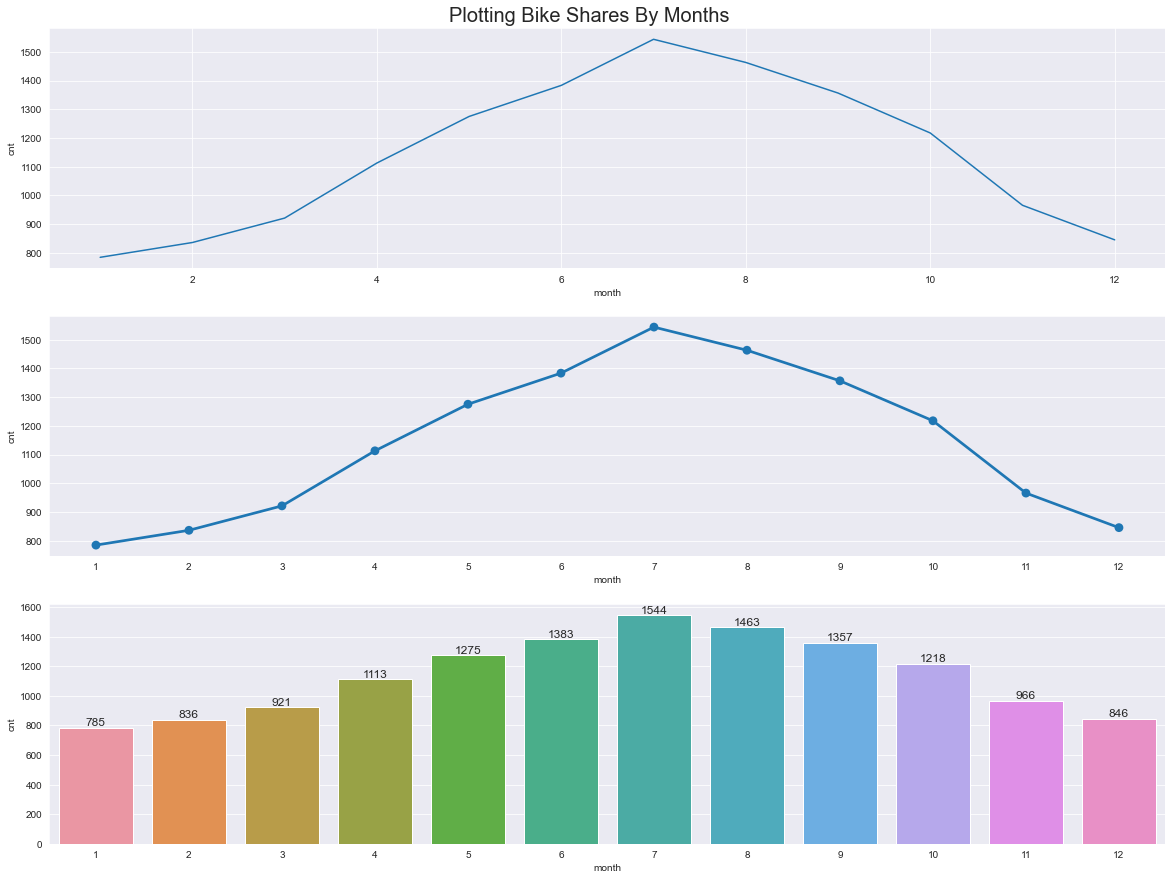

In [78]:

fig = plt.figure(figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Months", y = 0.9, fontsize = 20)

plt.subplot(3,1,1)
sns.lineplot(x = df.month, y = df.cnt, ci = None)

plt.subplot(3,1,2)
sns.pointplot(x = df.month, y = df.cnt, ci = None)

plt.subplot(3,1,3)
ax = sns.barplot(x = df.month, y = df.cnt, ci = None)
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f", fontsize = 12);

In [79]:
df.groupby("hour")["cnt"].mean()

hour
0      290.609116
1      200.631215
2      136.303745
3       94.245492
4       73.313454
5      110.707351
6      466.626722
7     1468.745179
8     2882.823204
9     1653.019257
10    1064.660690
11    1151.218707
12    1433.717421
13    1505.739011
14    1472.004121
15    1564.621399
16    1869.801370
17    2829.585165
18    2629.043956
19    1651.510316
20    1059.781293
21     741.249311
22     592.409655
23     439.652355
Name: cnt, dtype: float64

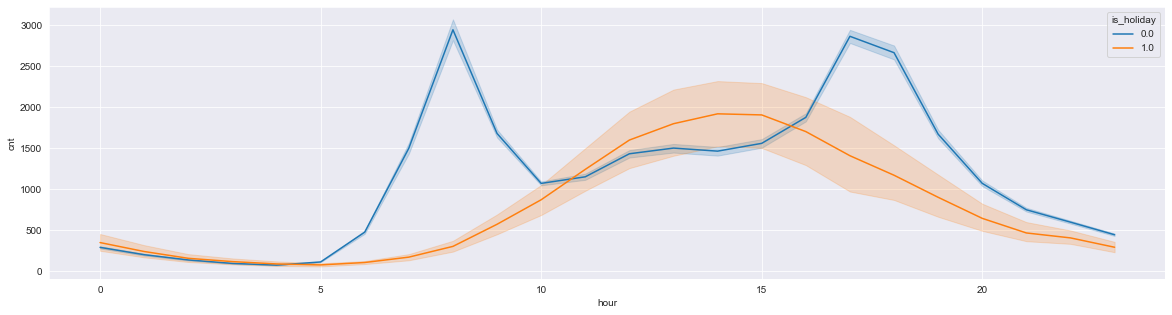

In [80]:

plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'is_holiday');

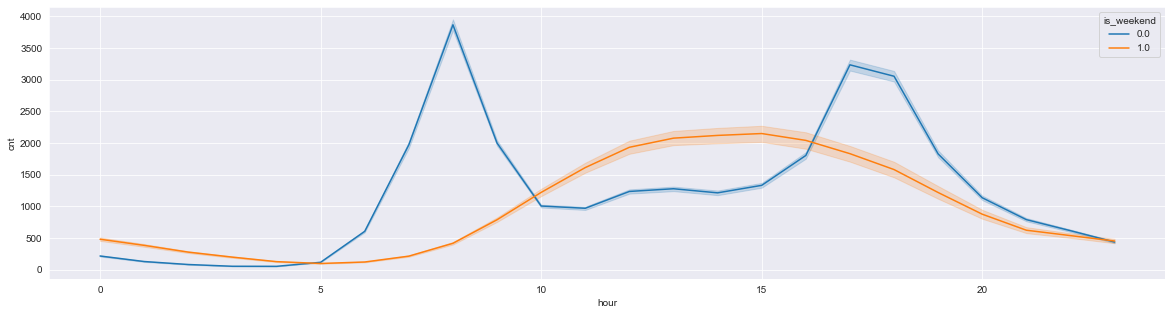

In [81]:

plt.figure(figsize = (20, 5))
sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'is_weekend');


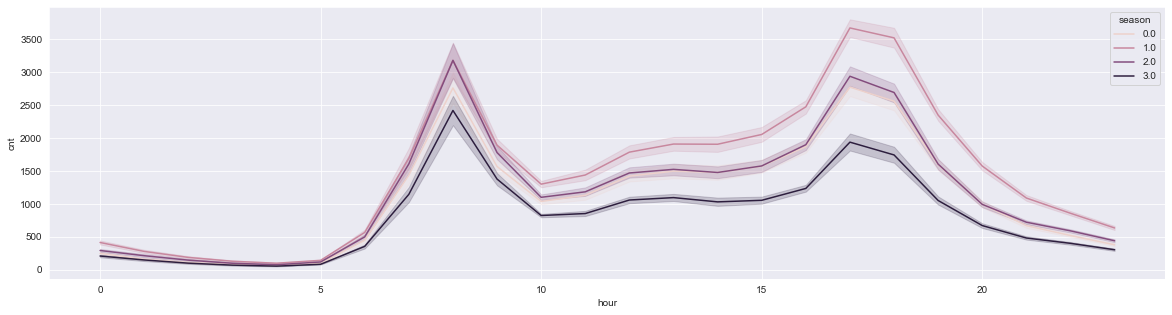

In [82]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'season')
plt.show()

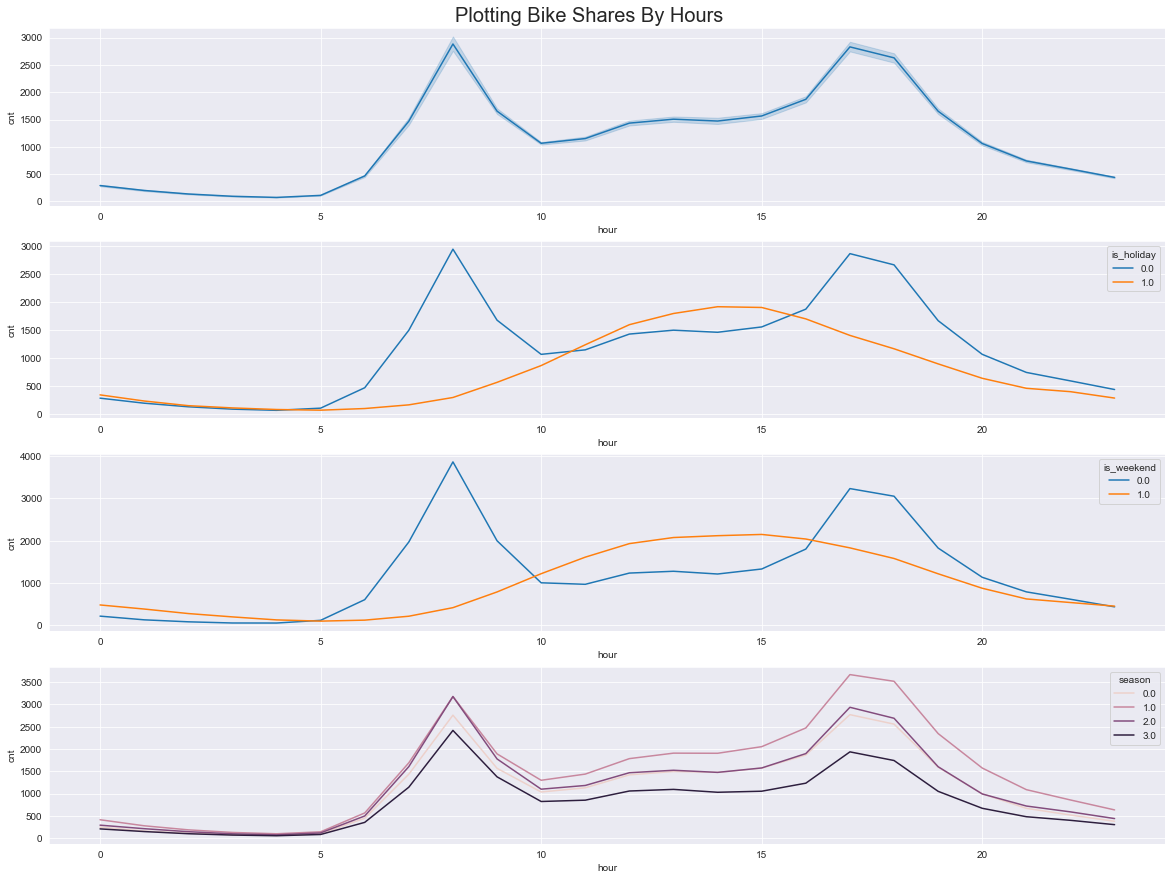

In [83]:

fig = plt.figure(figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Hours", y = 0.9, fontsize = 20)

plt.subplot(4,1,1)
sns.lineplot(x = df.hour, y = df.cnt)

plt.subplot(4,1,2)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.is_holiday, ci = None)

plt.subplot(4,1,3)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.is_weekend, ci = None)

plt.subplot(4,1,4)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.season, ci = None);

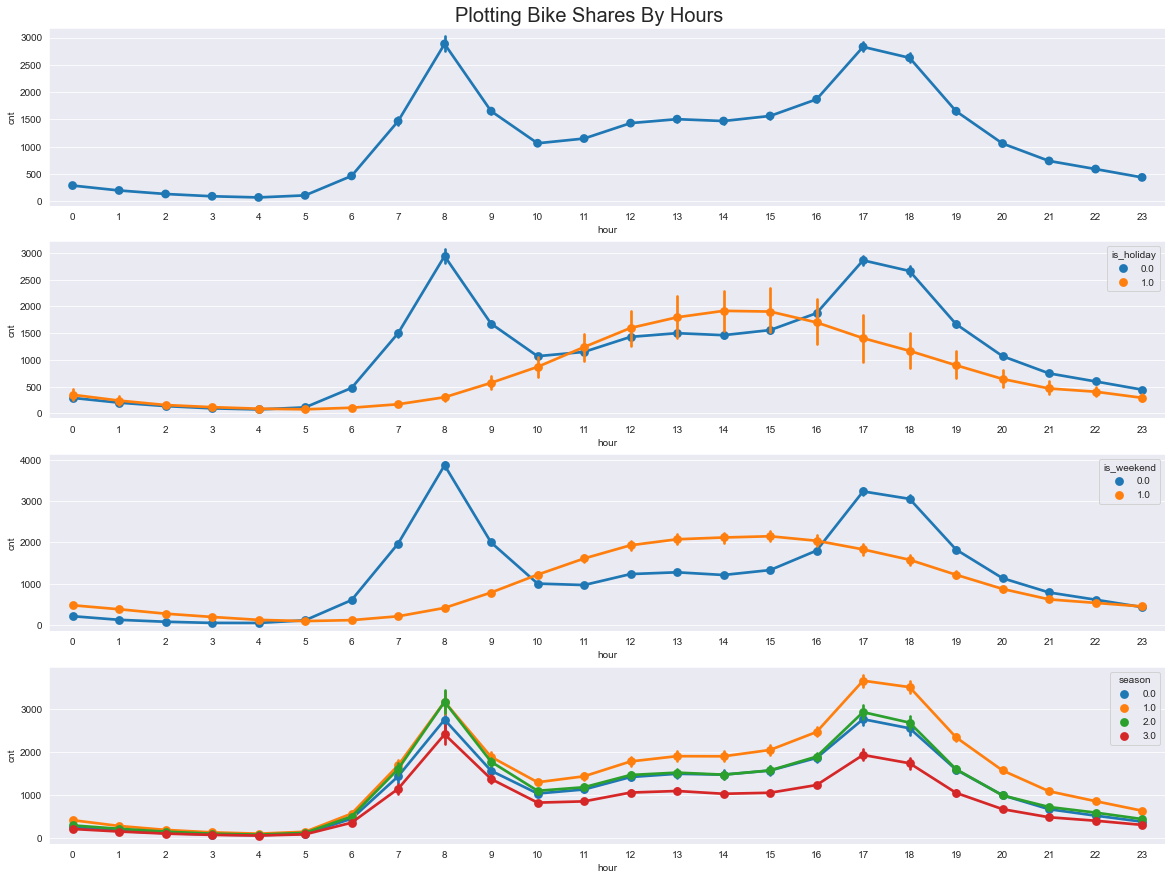

In [84]:
fig, (ax1, ax2, ax3, ax4)  =  plt.subplots(nrows = 4, figsize = (20, 15))

fig.suptitle("Plotting Bike Shares By Hours", y = 0.9, fontsize = 20)

sns.pointplot(data = df, x = 'hour', y = 'cnt', ax = ax1)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'is_holiday', ax = ax2)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'is_weekend', ax = ax3)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'season', ax = ax4);

In [85]:

df.groupby("day_of_week")["cnt"].mean()

day_of_week
0    1130.270734
1    1230.105389
2    1244.409000
3    1258.810594
4    1182.772653
5     995.553753
6     959.567265
Name: cnt, dtype: float64

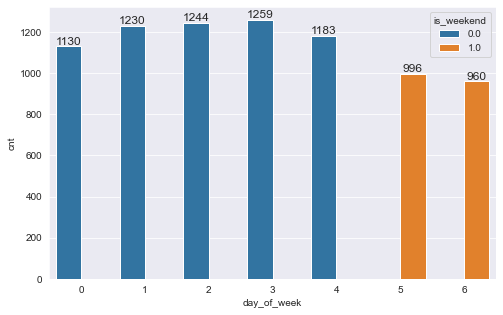

In [86]:
plt.figure(figsize = (8,5))

ax = sns.barplot(x = "day_of_week", 
                 y = "cnt", 
                 data = df, 
                 hue = 'is_weekend',
                 ci = None)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12);


<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

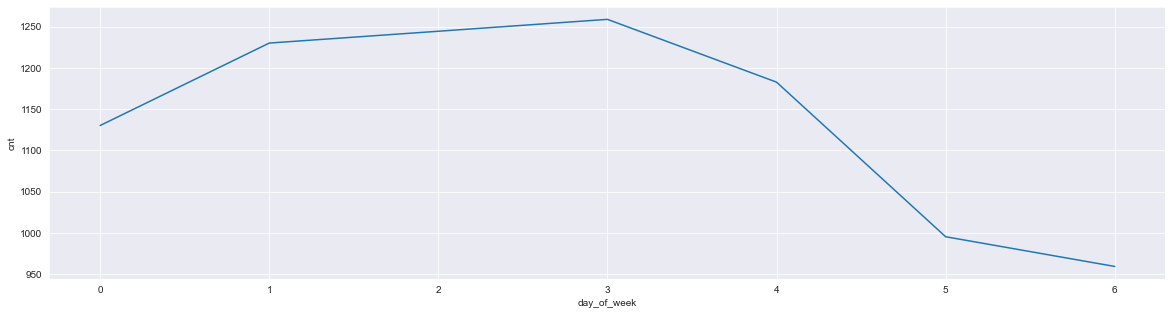

In [87]:

plt.figure(figsize = (20,5))

sns.lineplot(x = df.day_of_week, 
             y = df.cnt,
             ci = None)

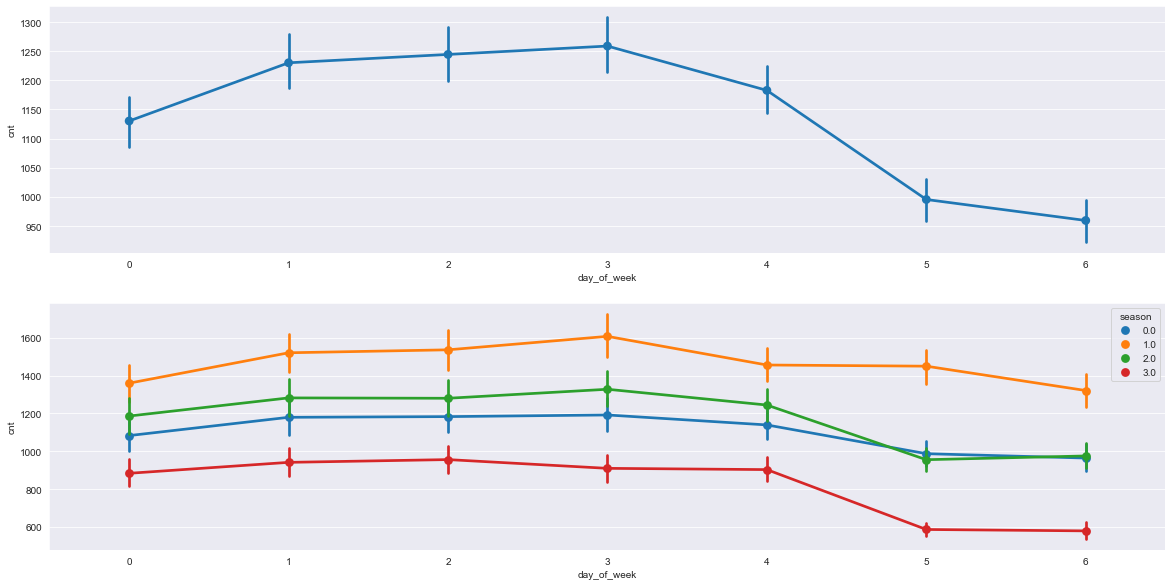

In [88]:

fig, (ax1, ax2) = plt.subplots(nrows = 2) 
fig.set_size_inches(20, 10)  

sns.pointplot(data = df, 
              x = 'day_of_week', 
              y = 'cnt', 
              ax = ax1)
sns.pointplot(x = "day_of_week", 
              y = "cnt", 
              data = df, 
              hue = "season", 
              ax = ax2)
plt.show()

In [89]:

df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))

day_of_month
1     1077
2     1088
3     1128
4     1144
5     1141
6     1211
7     1194
8     1223
9     1261
10    1157
11    1204
12    1167
13    1139
14    1124
15    1176
16    1141
17    1182
18    1179
19    1153
20    1116
21    1126
22    1128
23    1174
24    1054
25    1191
26    1082
27    1131
28    1063
29    1080
30    1156
31     968
Name: cnt, dtype: int64

In [90]:
dom = pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom')
dom.T

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


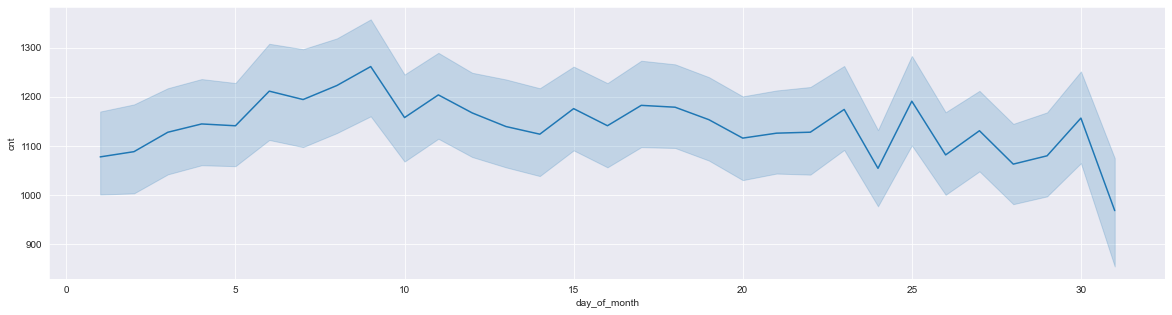

In [91]:

plt.figure(figsize = (20, 5))

ax = sns.lineplot(x = 'day_of_month', 
                  y = 'cnt', 
                  data = df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom').T 


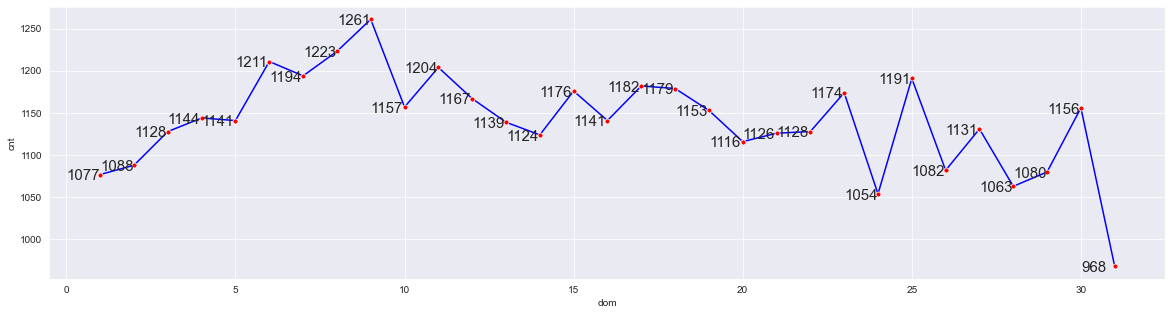

In [92]:
plt.figure(figsize = (20, 5))

ax = sns.lineplot(dom.index, 
                  dom["cnt"], 
                  color = 'blue', 
                  linestyle = '-', 
                  marker = 'o', 
                  markerfacecolor = 'red', 
                  markersize = 5)

for index, value  in enumerate(dom.cnt.values):
    plt.text(index,value,str(value), va = "center_baseline", ha = "left", fontsize=15)

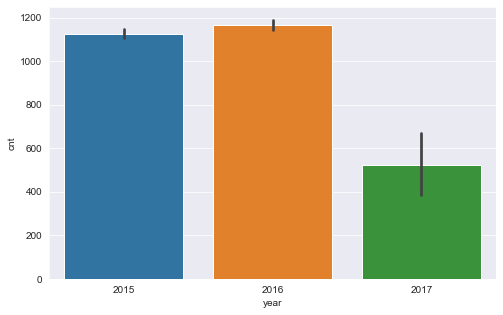

In [93]:

plt.figure(figsize = (8,5))
sns.barplot(x = "year", 
            y = "cnt", 
            data = df);


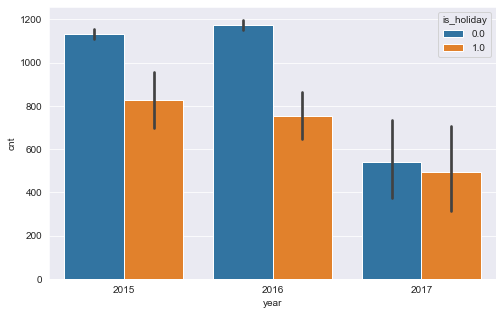

In [94]:
plt.figure(figsize=(8,5))

sns.barplot(x = df.year, y = df.cnt, hue = df.is_holiday);

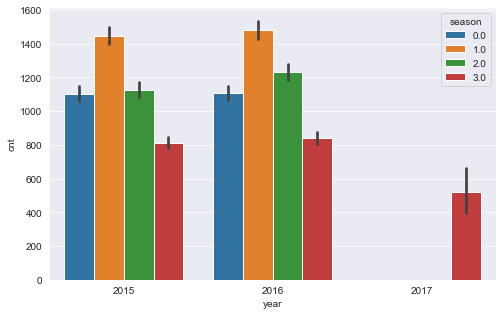

In [95]:
plt.figure(figsize = (8,5))

sns.barplot(x = df.year, 
            y = df.cnt, 
            hue = df.season);

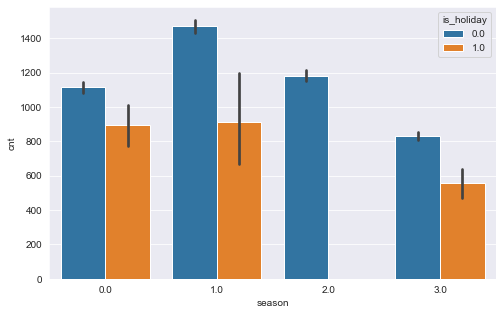

In [96]:

plt.figure(figsize = (8,5))

sns.barplot(x = df.season, 
            y = df.cnt, 
            hue = df.is_holiday);

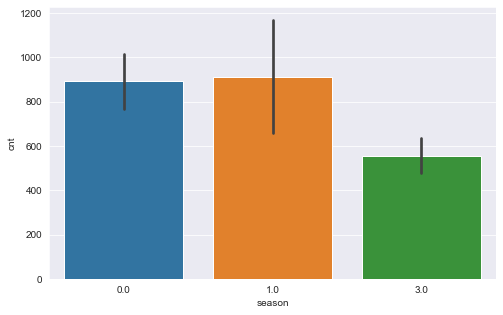

In [97]:

plt.figure(figsize = (8,5))
sns.barplot(x = "season", 
            y = "cnt", 
            data = df[df["is_holiday"] == 1]);

In [98]:
round(df['is_weekend'].value_counts(normalize = True) * 100, 1)

0.0    71.5
1.0    28.5
Name: is_weekend, dtype: float64

In [99]:
df.is_weekend.value_counts().values

array([12444,  4970], dtype=int64)

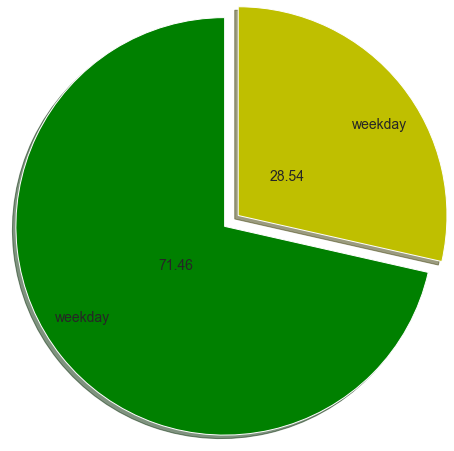

In [100]:
fig, ax = plt.subplots(figsize = (10,8))

ax.pie(x = df.is_weekend.value_counts().values,
       labels = ["weekday", "weekday"],
       explode = [0, 0.1],
       colors = ["g", "y"],
       autopct = "%.2f",
       pctdistance=0.3,
       shadow = True,
       labeldistance = 0.7,
       startangle = 90,
       radius = 1.2,
       textprops = {'fontsize': 14})
plt.show()

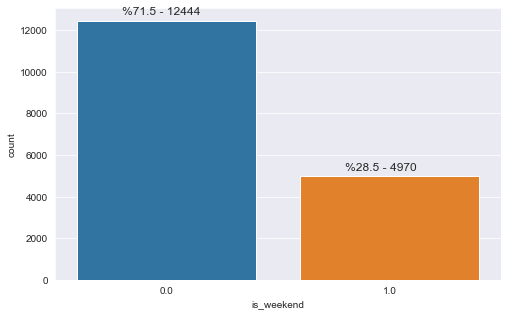

In [101]:

plt.figure(figsize=(8,5))

ax = sns.countplot(x = 'is_weekend', 
                   data = df)

for bar in ax.patches:
    ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ), 
                (bar.get_x()+0.2, bar.get_height()+300),
                size=12)

<AxesSubplot:xlabel='weather_code', ylabel='count'>

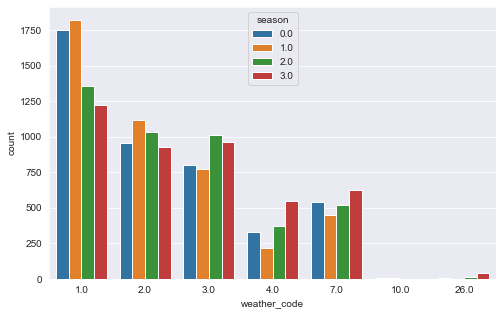

In [102]:

plt.figure(figsize = (8,5))
sns.countplot(x = "weather_code", 
              hue = "season", 
              data = df)


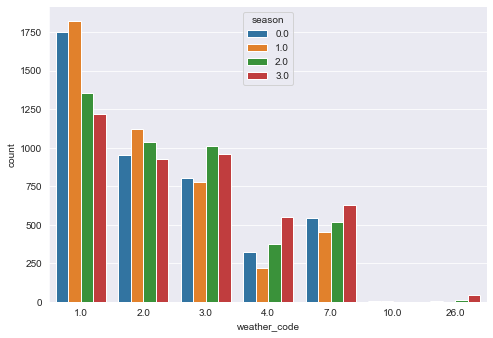

In [103]:

sns.catplot(x = "weather_code", 
            hue = "season", 
            data = df, 
            kind = 'count', 
            size = 4.8, 
            aspect = 1.45, 
            legend_out = False);

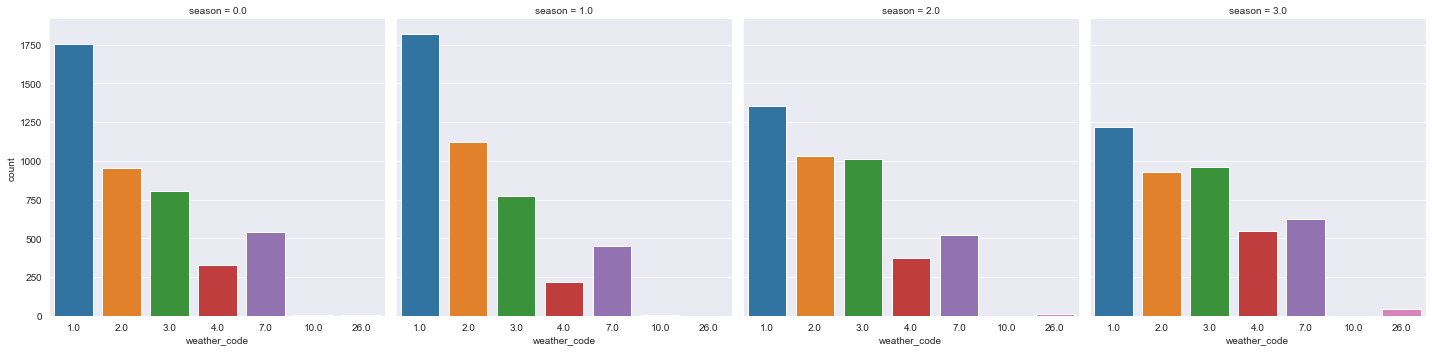

In [104]:

g = sns.catplot(x = "weather_code", 
                col = "season", 
                data = df, 
                kind = 'count');

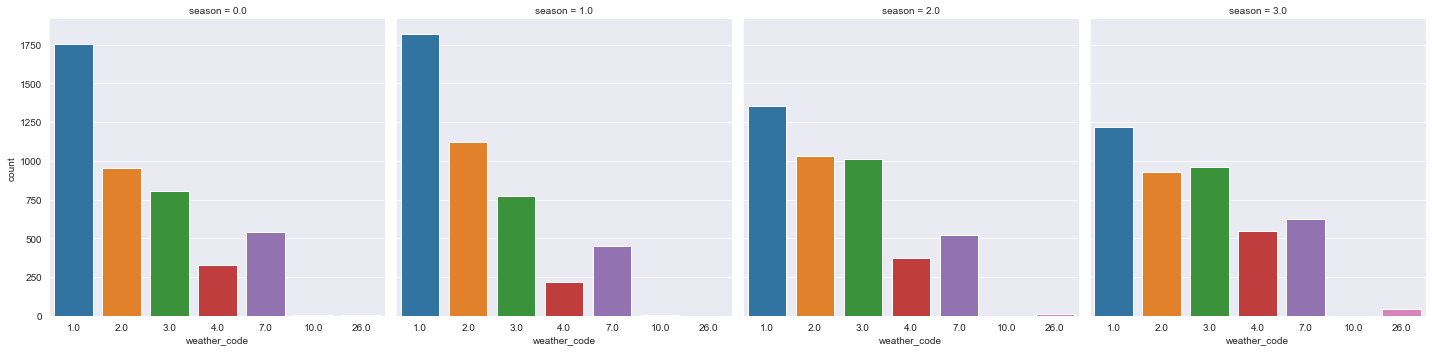

In [105]:

sns.catplot(x = "weather_code", 
            col = "season", 
            col_wrap = 4, 
            data = df, 
            kind = "count");

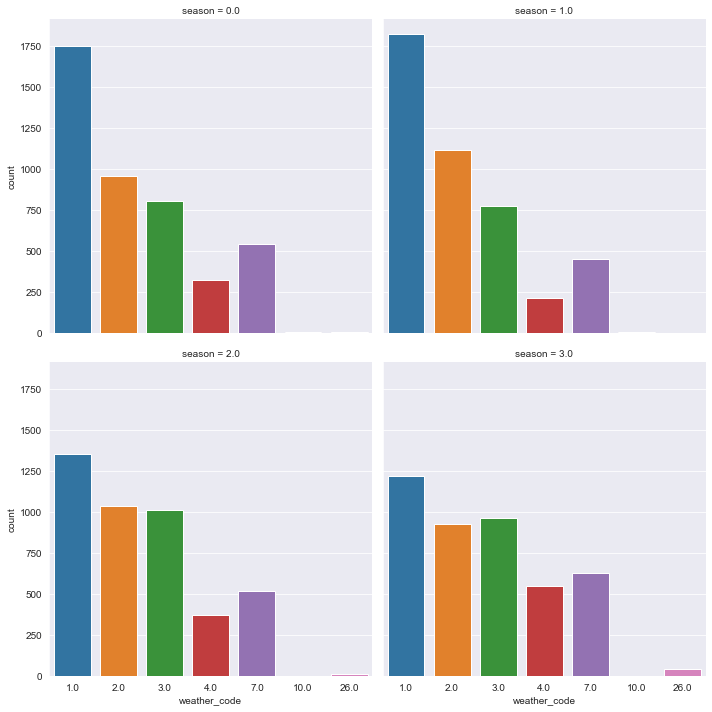

In [106]:

sns.catplot(x = "weather_code", 
            col = "season", 
            col_wrap = 2, 
            data = df, 
            kind = "count");

In [107]:
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2


In [108]:
df_pivot = df.pivot_table(index = "year", columns = "month", values = "cnt")
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,814.663189,810.125186,941.723951,1156.581363,1203.512097,1441.076709,1514.441892,1389.719086,1255.243319,1175.334239,952.646976,814.645946
2016,782.954301,861.787791,900.585734,1069.325452,1346.686828,1324.649645,1572.910931,1536.910811,1462.106881,1259.362046,978.941586,876.220430
2017,523.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


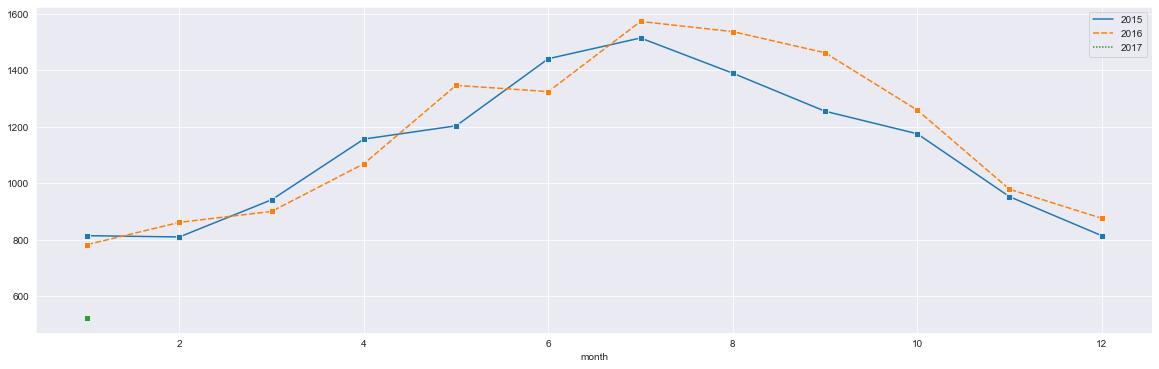

In [109]:
plt.figure(figsize = (20, 6))

sns.lineplot(data = df_pivot.T, 
             marker = "s")
plt.legend(loc = 1);